# Dağılım Grafikleri

## Barplot

Elimizdeki kategorik değişkenleri, sutün grafikler şeklinde şekillendirmek için kullanılır. 

In [3]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Veri setine hızlı bakış

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
# ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [8]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [11]:
# typini kategorik değişkene dönüştür. sıralı şekilde.
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [12]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [13]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [14]:
cut_kategoriler = ["Fair","Good","Very Good","Premium ","Ideal"]

In [17]:
# kurstaki örnekte(veri seti hikayesinde) kategori sıralaması yukardaki gibiydi. o şekle getirmek için :
df.cut = df.cut.astype(CategoricalDtype(categories =cut_kategoriler, ordered = True))

In [16]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

# barplot grafiği çizelim

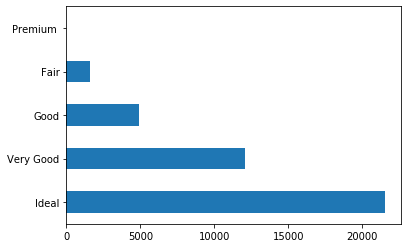

In [19]:
df["cut"].value_counts().plot.barh();

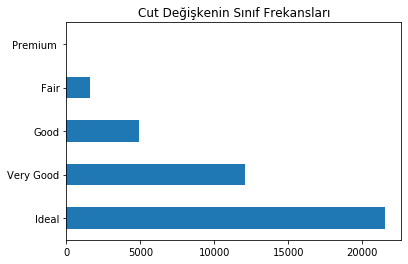

In [20]:
# grafiğe bilgi notu eklemek : set_title

df["cut"].value_counts().plot.barh().set_title("Cut Değişkenin Sınıf Frekansları");

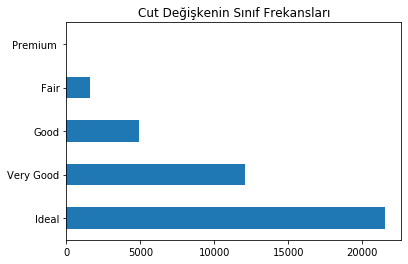

In [21]:
# kodlar uzayabilir bu yüzden şu formatta yazılabilir okunması açısından. 

(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkenin Sınıf Frekansları"));

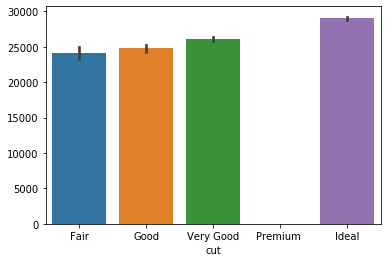

In [23]:
# seaborn ile yüksek seviye grafik işlemi. x ve y eksenlerine veriye vererek çizdik.
sns.barplot(x = "cut", y = df.cut.index, data= df);

# Çaprazlama

cut ile price çaprazlaması yapacağız.

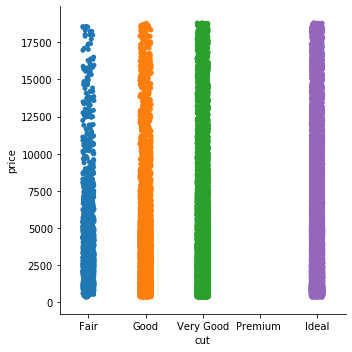

In [27]:
sns.catplot(x = "cut", y = "price", data= df);

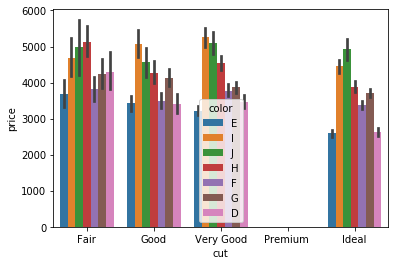

In [29]:
# boyut eklemek : price bazında ayrılmış hali. hue komutu ile 3. boyut ekledik.
sns.barplot(x = "cut", y="price", hue="color", data= df);

In [30]:
# doğrulama : yukarda oluşturduğumuz grafiğin doğrulanması. veriler ve çizilen grafik gibisinden.
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D                NaN
           E                NaN
           F                NaN
           G                NaN
           H                NaN
           I                NaN
           J                NaN
Ideal      D        2629.094566
           E        2597.550090
           F        337

# Histogram ve Yoğunluk

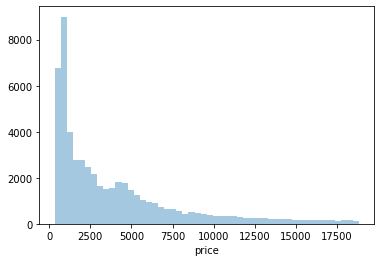

In [31]:
# distplot : dağılım görselleştirmek için kullanılan fonksiyondur. 
# kde : yoğunluk fonksiyonunun grafik üzerine koyulup koyulmaması durumu.
sns.distplot(df.price, kde = False);

In [32]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Whether

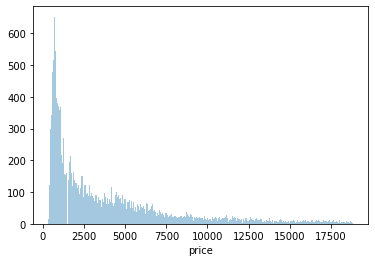

In [35]:
# bins : daha hassas oluyor sayı yükseldikçe
sns.distplot(df.price, bins = 1000, kde = False);

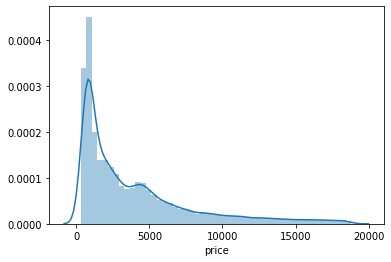

In [36]:
# olasilik yoğunluğu grafiği
sns.distplot(df.price);

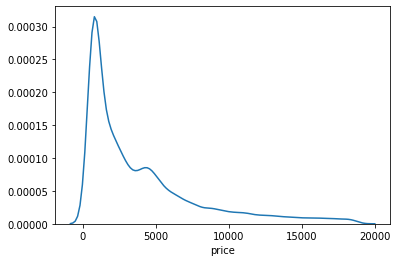

In [37]:
# yoğunluktan kurtulamk için hist = false yapılır
sns.distplot(df.price, hist = False);

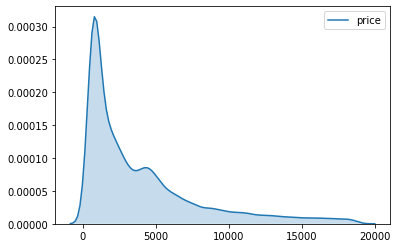

In [38]:
# yukardaki grafiğin altını doldurmak için kdeplot kullanırız.
sns.kdeplot(df.price, shade=True);

# Histogram Çaprazlama 

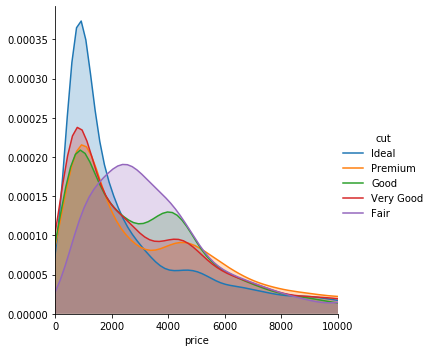

In [4]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height =5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

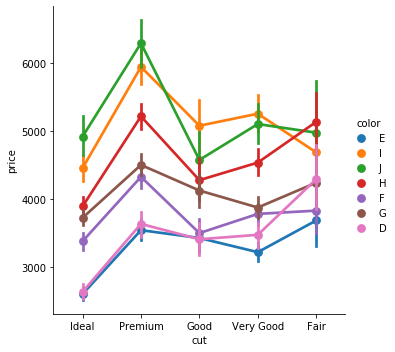

In [5]:
sns.catplot(x = "cut", y="price", hue = "color", kind ="point", data = df);

# Boxplot

Kutu grafikler

In [9]:
# bir restoranttaki bahşişlerden elde edilen veri tipini çekelim.
import seaborn as sns 
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [11]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [12]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [13]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [14]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## boxplot grafikleştirme :

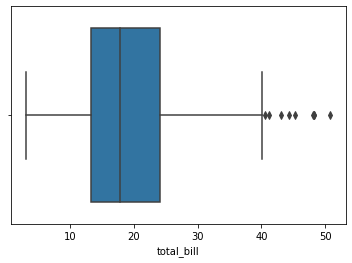

In [16]:
sns.boxplot(x = df["total_bill"]);

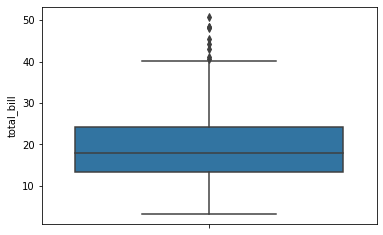

In [17]:
# dikey kutu grafik
sns.boxplot(x = df["total_bill"] , orient = "v");

### boxplot için çaprazlama işlemleri 

In [19]:
# hangi günler daha çok kazanıyoruz? 

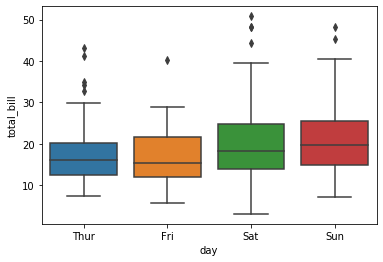

In [20]:
sns.boxplot(x = "day", y="total_bill", data = df);

In [21]:
# sabah mı akşam mı daha çok kazanıyoruz? 

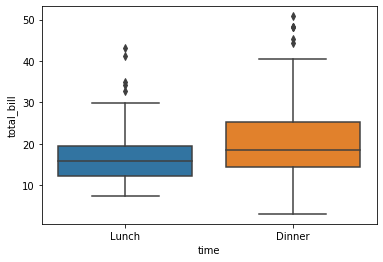

In [23]:
sns.boxplot(x = "time", y="total_bill", data = df);
# akşam yemeklerinde daha fazla para kazandığımız gözlemleniyor.

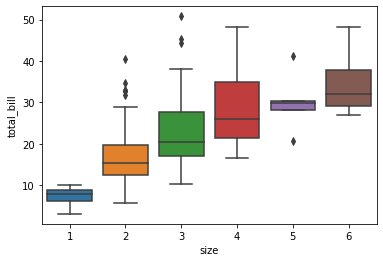

In [24]:
# kişi sayısı kazanc
sns.boxplot(x = "size", y="total_bill", data = df);

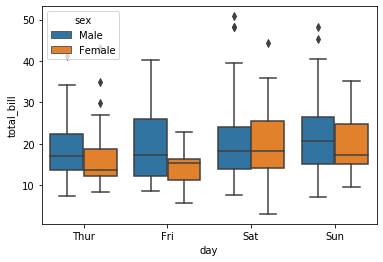

In [26]:
# günler ve cinsiyete göre ödeme oranları
sns.boxplot(x = "day", y="total_bill", hue="sex", data = df);

# Violin Grafik

kutuya benzer grafiktir. yoğunluk grafiyle kutu grafik kesisimi olarak düşünülebilir.

In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


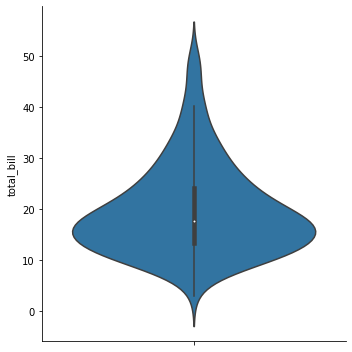

In [29]:
sns.catplot(y="total_bill", kind="violin", data = df)
# orta seviyede yoğunluğu ifade ediyor. tercihe göre kullanılır. :))

#### violin grafik çaprazlama

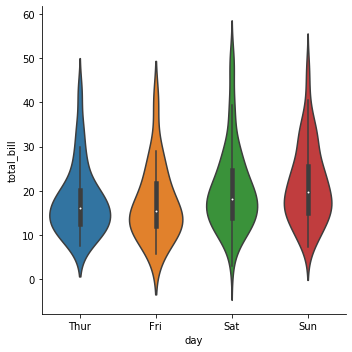

In [31]:
sns.catplot(x = "day", y="total_bill", kind="violin", data = df);

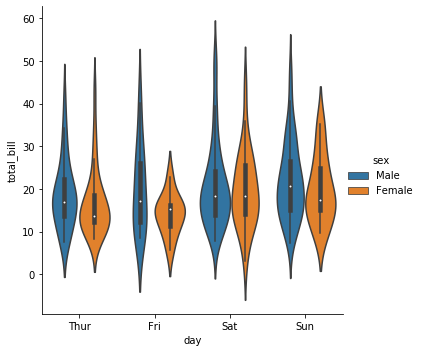

In [33]:
# kırılım, çaprazlama, boyut ekleme anlamında...
# hue ile 3. boyut ekleyelim.
sns.catplot(x = "day", y="total_bill", hue= "sex", kind="violin", data = df);

# Korelasyon Grafikleri

# Scatterplot
iki değişkenin arasındaki ilişkiyi ifade etmede kullanılır. Saçılım grafiği denir.

In [2]:
import seaborn as sns 
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


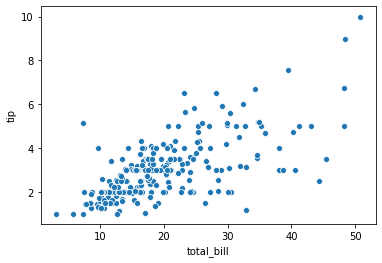

In [6]:
# ödeme tutarı arttıkca, bahşişlerin arttığını ifade eder bu grafik.
sns.scatterplot(x="total_bill", y="tip", data = df);

Çaprazlama

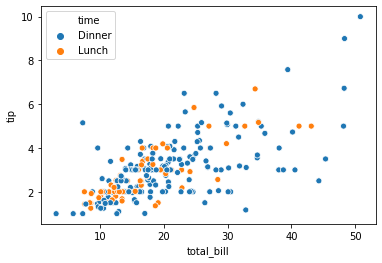

In [8]:
# ödenen artınca akşam yemeğimi yoksa öğlen yemeğindemi bahşiş artıyor?
sns.scatterplot(x="total_bill", y="tip", hue="time", data = df);

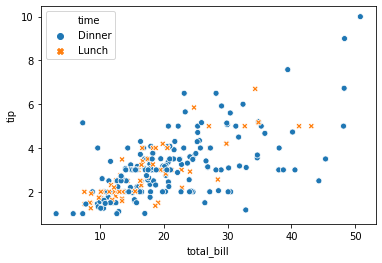

In [9]:
#style : grafiğin görüntüsünü değiştirmek için kullanırız.
sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data = df);

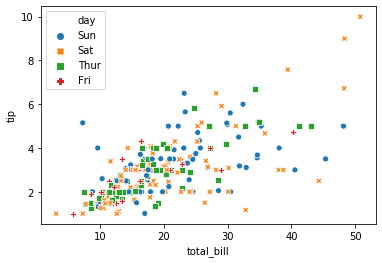

In [11]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="day", data = df);

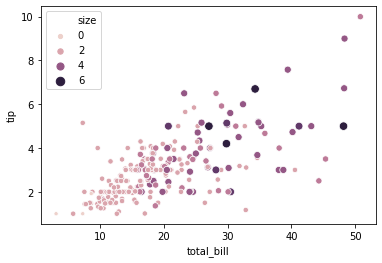

In [13]:
# masadaki kişi sayısına göre yuvarlak işaretle grafiksel yorumlama
sns.scatterplot(x="total_bill", y="tip", hue="size", size = "size", data = df);

# Doğrusal İlişkinin Gösterilmesi

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

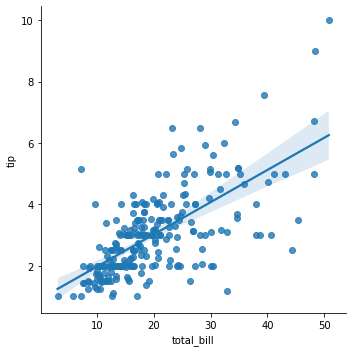

In [15]:
sns.lmplot(x="total_bill", y="tip", data = df);

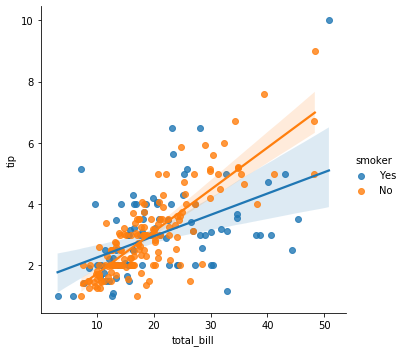

In [16]:
sns.lmplot(x="total_bill", y="tip", hue = "smoker", data = df);

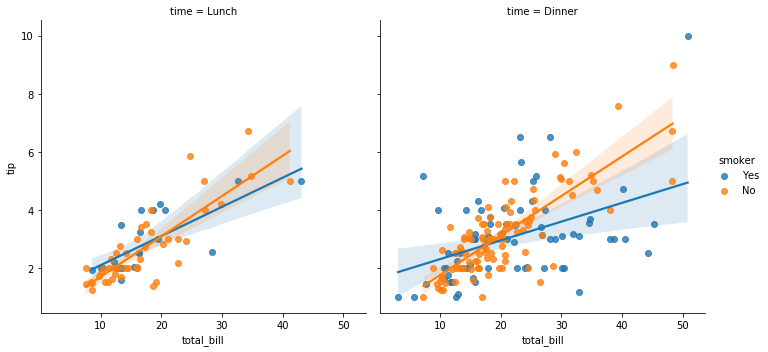

In [17]:
# col ile argumanı ile 2 farklı grafik oluşturduk.
sns.lmplot(x="total_bill", y="tip", hue = "smoker", col = "time", data = df);

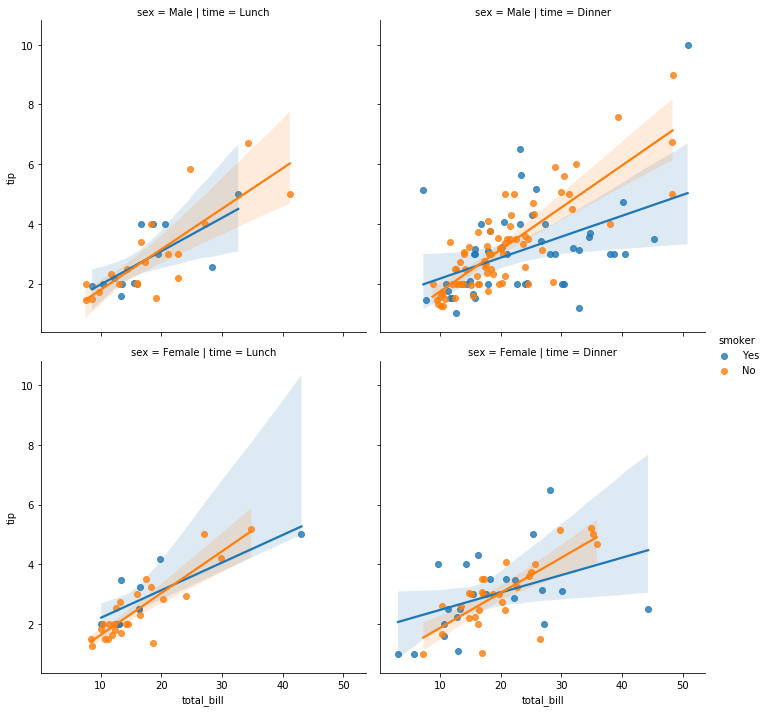

In [18]:
sns.lmplot(x="total_bill", y="tip", hue = "smoker", col = "time", row = "sex", data = df);

## Scatterplot Matrisi

çiçek türlerini ifade eden veri setimiz :

In [20]:
import seaborn as sns;
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [23]:
df.shape

(150, 5)

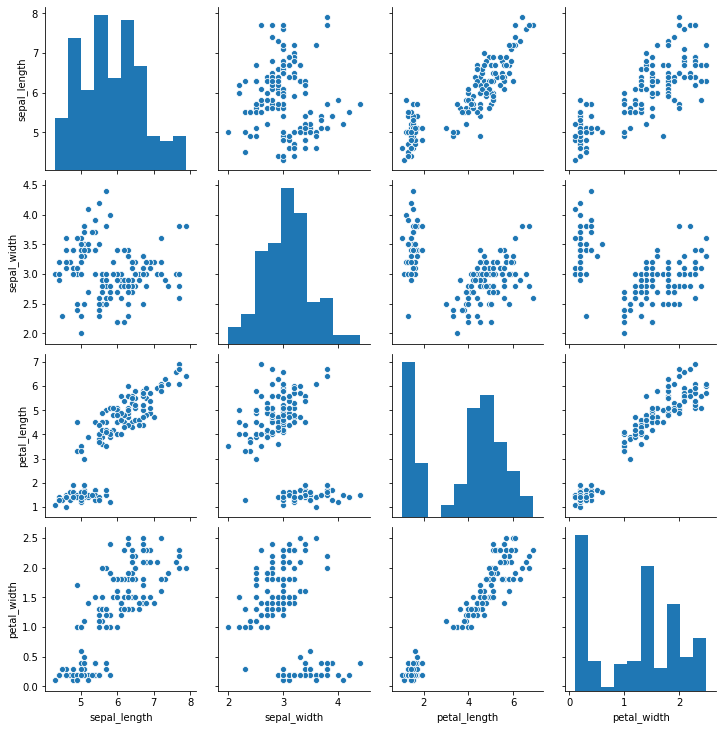

In [24]:
sns.pairplot(df);

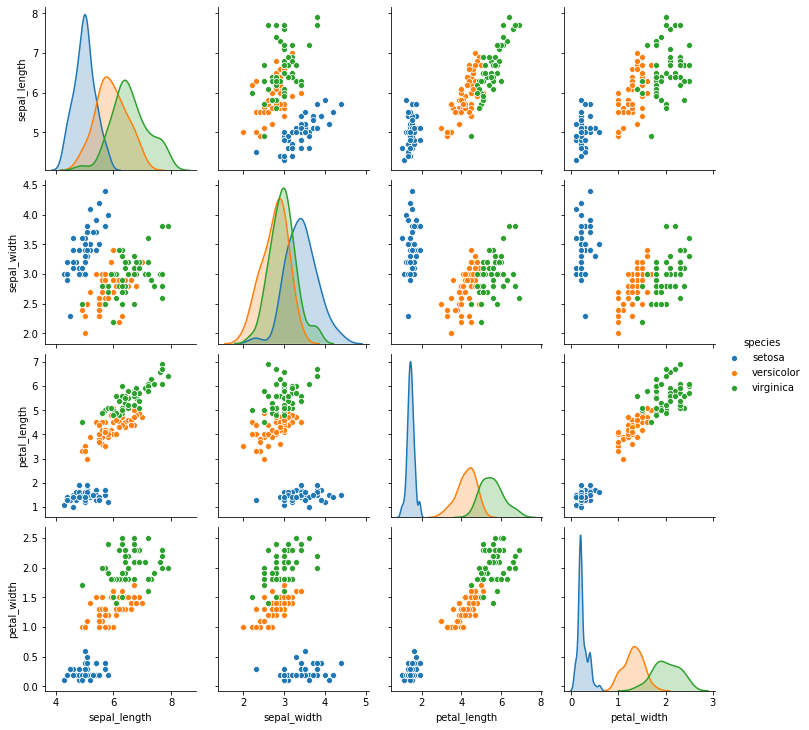

In [25]:
sns.pairplot(df, hue = "species");

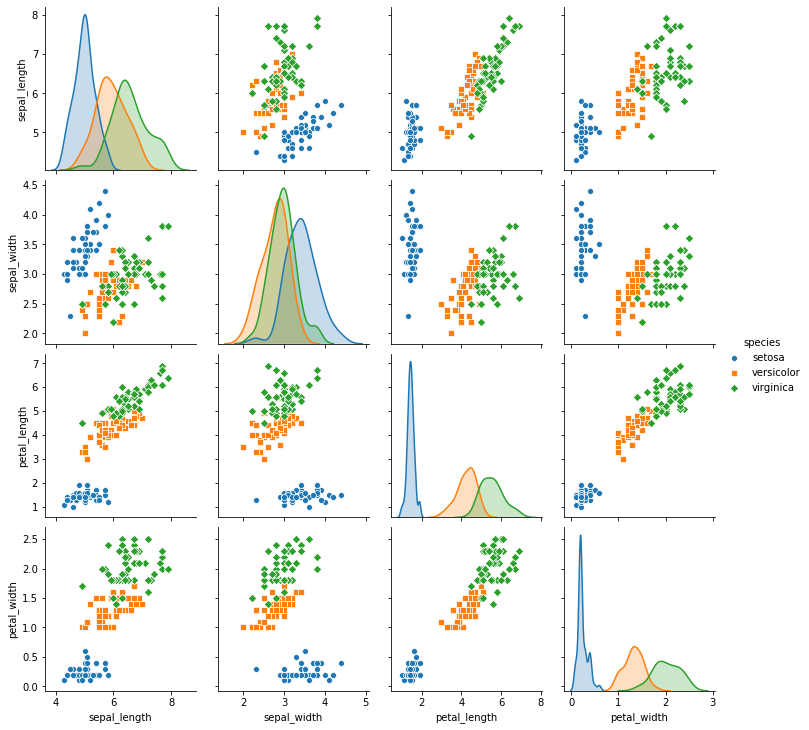

In [26]:
# markers : işaretleri kullanarak veriyi görsel şekilde ifade etmek.
sns.pairplot(df, hue = "species", markers = ["o","s","D"] );

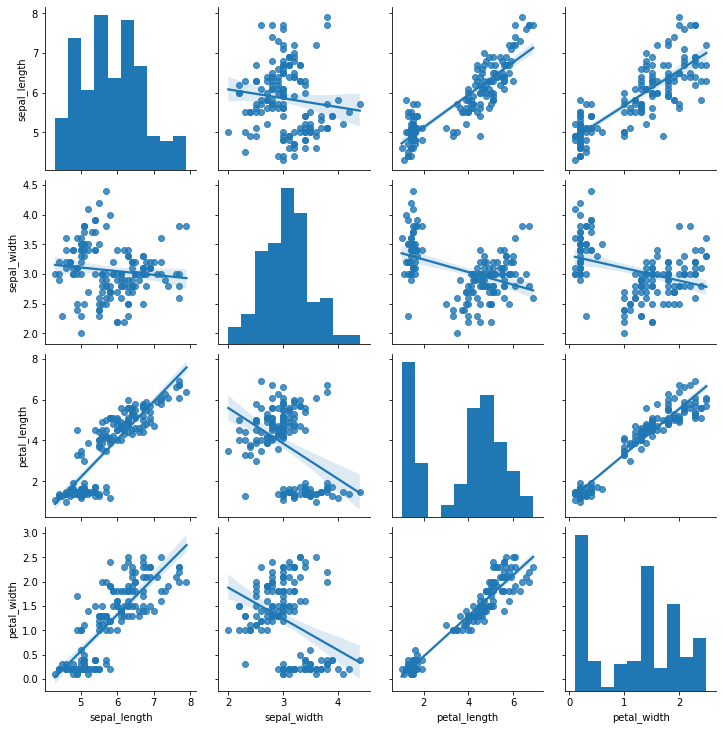

In [27]:
# grafiğe doğru eklemek kind komutu
sns.pairplot(df, kind = "reg");

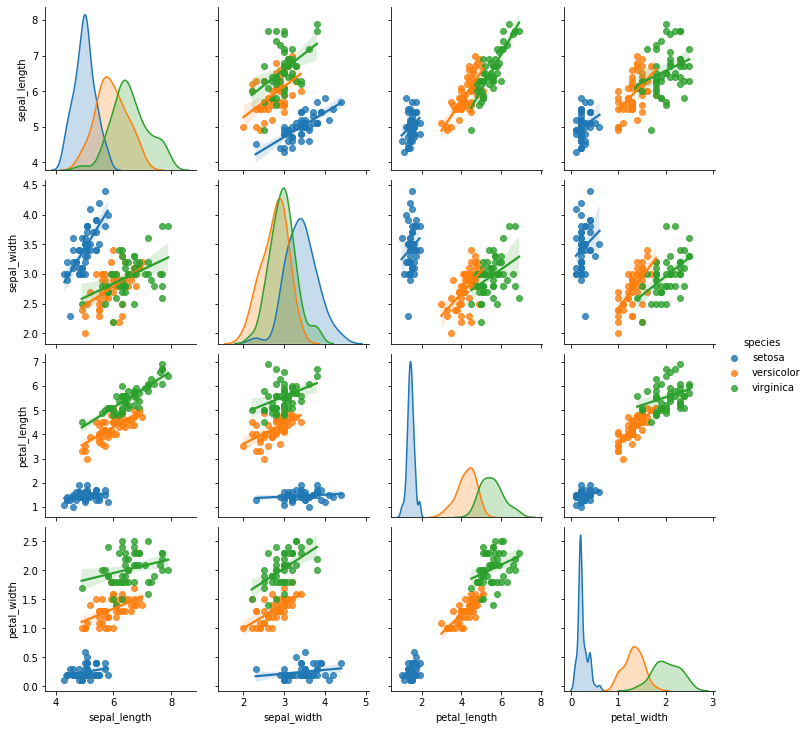

In [29]:
sns.pairplot(df, kind = "reg", hue = "species");

# Heatmap 

Isı Haritası : Elimizdeki değişkenleri yapısal anlamda daha perf. görmek istersek kullanıyoruz.

In [30]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()
# yıllara, aylara göre ucan yolcu sayısını veren veri seti.

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [32]:
# veri setinin satır ve kolon sayıları
df.shape

(144, 3)

In [33]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [39]:
# x,y ve kesisecekleri nokta yazılır sırasıyla.
df = df.pivot("month","year","passengers");

KeyError: 'month'

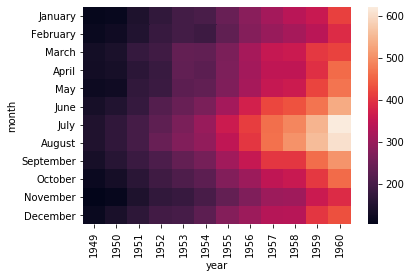

In [40]:
# heatmap : pivot table istiyor yukardaki şekilde formatlamanda olmaz hata veriyor.
sns.heatmap(df);

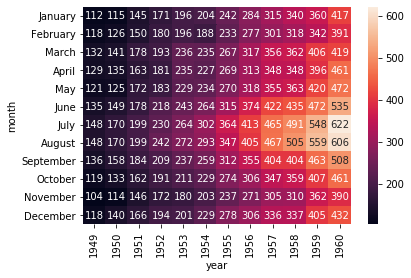

In [41]:
# hücreleri kendi değeleriyle doldurma ve gözlemleme
sns.heatmap(df, annot = True, fmt = "d");

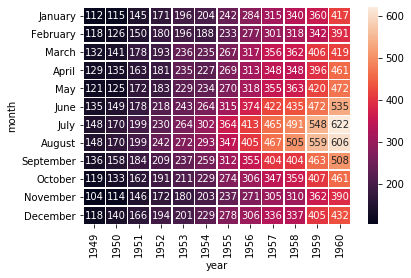

In [42]:
# okunması zor oluyor araya birer çizgi çekelim dersek : 
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

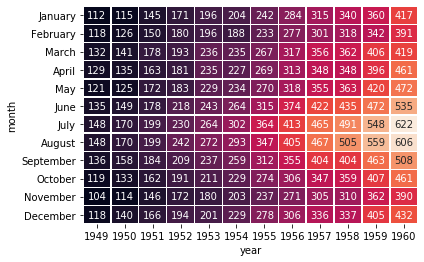

In [44]:
# sağdaki barı kaldırmak istersek: cbar = False
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

# Çizgi Grafik 

Veri setinin Hikayesi

In [1]:
import seaborn as sns 
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()
# beyne bağlanan bir cihaz ile toplanan veri seti.

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [4]:
df.shape

(1064, 5)

In [5]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [6]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [7]:
# her bir zaman noktasına veri sayılmışş. eşşiz olmasını beklerdik.
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [9]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [13]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


Çizgi Grafiğin Oluşturulması ve Çaprazlama

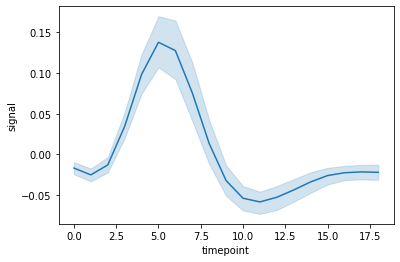

In [15]:
sns.lineplot(x="timepoint", y="signal", data = df);

çaprazlama işlemi

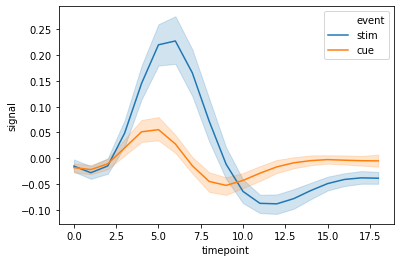

In [16]:
sns.lineplot(x="timepoint", y="signal", hue = "event", data = df);
# stim pig noktasını etkileyen faktör olduğunu görüyoruz öncekine göre :)

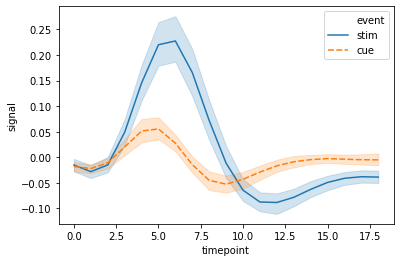

In [18]:
# style ekleme
sns.lineplot(x="timepoint", y="signal", hue = "event", style = "event", data = df);

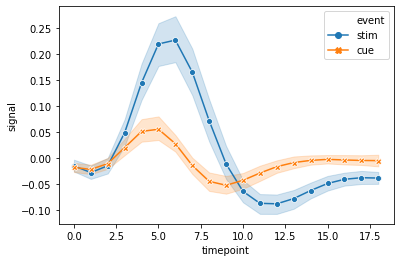

In [19]:
#noktalar ekleyelim.
sns.lineplot(x="timepoint", 
             y="signal", 
             hue = "event", 
             style = "event", 
             markers = True,
             dashes = False,
             data = df);

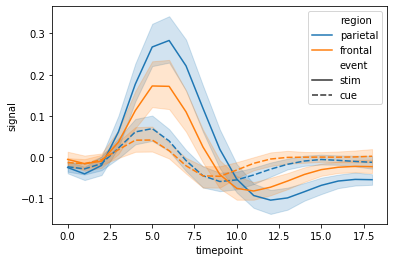

In [20]:
sns.lineplot(x="timepoint", 
             y="signal", 
             hue = "region", 
             style = "event", 
             data = df);

# Basit Zaman Serisi Grafiği

In [25]:
# indirme işlemleri pip ile olur.
!pip install pandas_datareader
import pandas_datareader as pr

In [26]:
# apple borsa verileri çek.
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2019-08-25")

In [27]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873


In [29]:
df.shape

(917, 6)

In [30]:
kapanis = df["Close"]

In [31]:
kapanis.head()

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
Name: Close, dtype: float64

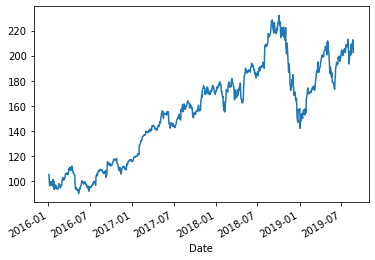

In [32]:
kapanis.plot();

In [33]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [35]:
# zaman değişkenin index'sine erişerek ifade etme
# zamana bağlı değişken varsa bu şekilde isimlendirme yapma ihtiyacı oluyor. 
# tarih değişkenin bir tarih değişkeni olduğunu ifade edilmesi gerekebilir.
import pandas as pd
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [36]:
kapanis.head()

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
Name: Close, dtype: float64

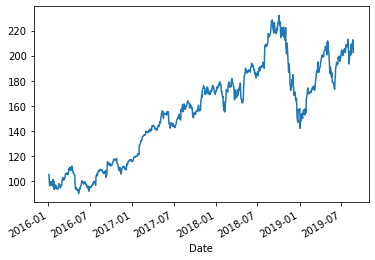

In [37]:
kapanis.plot();